steps for windows:
    
1. install python 3.7.6 version (recommended)
https://www.python.org/downloads/release/python-376/
install Windows x86-64 executable installer
    
2. execute this command in command prompt

pip install --upgrade pip

pip install https://storage.googleapis.com/tensorflow/windows/cpu/tensorflow_cpu-2.2.0-cp37-cp37m-win_amd64.whl


In [ ]:
#tensorflow installation
# Requires the latest pip
#pip install --upgrade pip

# Current stable release for CPU and GPU
!pip install tensorflow


In [2]:
pip install tensorflow==2.0

  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7547 sha256=f917a8b8bd3f513cf402c3d1d2471a1e65605740a874d85d64217b23d319b4f4
  Stored in directory: c:\users\kanna\appdata\local\pip\cache\wheels\21\7f\02\420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: tensorflow
    Found existing ins

In [1]:
import tensorflow

In [2]:
#importing tensorflow with alias tf
import tensorflow as tf

In [3]:
#tensorflow version
tf.__version__

'2.0.0'

In [10]:
#Loading dataset 
mnist = tf.keras.datasets.mnist

In [12]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [13]:
mnist

<module 'tensorflow_core.keras.datasets.mnist' from 'C:\\Users\\kanna\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [14]:
x_train, x_test = x_train / 255.0 , x_test / 255.0

In [15]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="relu")
])

In [20]:
#to get model structure
#param = imput layer1 * layer 2 (weight) + layer2 (bias)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


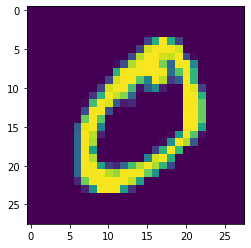

In [27]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [29]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.13956743, 0.        , 0.02081596, 0.        , 0.        ,
        0.        , 0.1550869 , 0.1071187 , 0.        , 0.        ]],
      dtype=float32)

In [30]:
tf.nn.softmax(predictions).numpy()

array([[0.11000922, 0.0956788 , 0.09769132, 0.0956788 , 0.0956788 ,
        0.0956788 , 0.11172982, 0.10649686, 0.0956788 , 0.0956788 ]],
      dtype=float32)

In [31]:
loss_func = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [38]:
loss_func(y_train[:1], predictions).numpy()

2.3467586

In [40]:
model.compile(
loss = loss_func,
optimizer= "adam",
metrics = ["accuracy"]
)

In [41]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 175us/sample - loss: 0.3416 - accuracy: 0.8979
Epoch 2/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1433 - accuracy: 0.9583
Epoch 3/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1092 - accuracy: 0.9665
Epoch 4/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0891 - accuracy: 0.9729
Epoch 5/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0749 - accuracy: 0.9772
Epoch 6/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0641 - accuracy: 0.9801
Epoch 7/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0594 - accuracy: 0.9806
Epoch 8/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.0519 - accuracy: 0.9833
Epoch 9/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0489 - accuracy: 0.9836
E

In [42]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.0404 - accuracy: 0.9784


[0.08049609440219356, 0.9784]

In [63]:
import seaborn as sns

In [90]:
iris = sns.load_dataset("iris")

In [91]:
iris["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [92]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [94]:
for cols in iris.columns:
    if cols != "species":
        iris[cols] = iris[cols] / max(iris[cols])

In [97]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.645570,0.795455,0.202899,0.08,1
1,0.620253,0.681818,0.202899,0.08,1
2,0.594937,0.727273,0.188406,0.08,1
3,0.582278,0.704545,0.217391,0.08,1
4,0.632911,0.818182,0.202899,0.08,1
...,...,...,...,...,...
145,0.848101,0.681818,0.753623,0.92,2
146,0.797468,0.568182,0.724638,0.76,2
147,0.822785,0.681818,0.753623,0.80,2
148,0.784810,0.772727,0.782609,0.92,2


In [96]:
iris["species"] = iris["species"].map({"versicolor":0,"setosa":1,"virginica":2})

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x = iris.iloc[:,0:4]
y = iris.iloc[:,4]

In [100]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,0.645570,0.795455,0.202899,0.08
1,0.620253,0.681818,0.202899,0.08
2,0.594937,0.727273,0.188406,0.08
3,0.582278,0.704545,0.217391,0.08
4,0.632911,0.818182,0.202899,0.08
...,...,...,...,...
145,0.848101,0.681818,0.753623,0.92
146,0.797468,0.568182,0.724638,0.76
147,0.822785,0.681818,0.753623,0.80
148,0.784810,0.772727,0.782609,0.92


In [116]:
x_train,x_test,y_train, y_test =  train_test_split(x , y , train_size = 0.7, random_state =12)

In [139]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(3)
])

In [141]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss= "sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [142]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [143]:
model.fit(x_train,y_train, epochs=20)

Train on 105 samples
Epoch 1/20
105/105 [==============================] - 1s 7ms/sample - loss: 3.4029 - accuracy: 0.4476
Epoch 2/20
105/105 [==============================] - 0s 230us/sample - loss: 1.0254 - accuracy: 0.5238
Epoch 3/20
105/105 [==============================] - 0s 190us/sample - loss: 1.0254 - accuracy: 0.5238
Epoch 4/20
105/105 [==============================] - 0s 181us/sample - loss: 1.0254 - accuracy: 0.5238
Epoch 5/20
105/105 [==============================] - 0s 167us/sample - loss: 1.0254 - accuracy: 0.5238
Epoch 6/20
105/105 [==============================] - 0s 196us/sample - loss: 1.0254 - accuracy: 0.5238
Epoch 7/20
105/105 [==============================] - 0s 186us/sample - loss: 1.0254 - accuracy: 0.5238
Epoch 8/20
105/105 [==============================] - 0s 208us/sample - loss: 1.0254 - accuracy: 0.5238
Epoch 9/20
105/105 [==============================] - 0s 247us/sample - loss: 1.0254 - accuracy: 0.5238
Epoch 10/20
105/105 [========================

In [ ]:
#https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough